# Penguin

## Reference

In [179]:
# https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species

## Import Library

In [180]:
import pandas as pd
import numpy as np
import re
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

## Import Dataset

In [181]:
path = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/penguins.csv'
penguin = pd.read_csv(path)

## Orgnize and clean data

In [182]:
penguin.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [183]:
# clear missing data
penguin = penguin.dropna()
# change object to int type
object_name = penguin.select_dtypes('object').columns
la = LabelEncoder()
penguin[object_name] = penguin[object_name].apply(la.fit_transform)
penguin.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,2
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,2


In [184]:
penguin.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [186]:
cond = penguin.columns == 'sex'
non_sex_columns = penguin.columns[~cond]
# normalize the data
std = StandardScaler()
penguin1 = penguin.copy()
penguin1.loc[:,:] = std.fit_transform(penguin1.loc[:,:])
penguin1.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.897723,0.777263,-0.126893,-0.572233,0.985324
1,-0.824265,0.117037,-0.107872,-0.509923,-0.991224
2,-0.677349,0.421757,-0.073633,-1.195338,-0.991224
4,-1.338472,1.081983,-0.081242,-0.946096,-0.991224
5,-0.860994,1.742210,-0.092655,-0.696854,0.985324


## PCA

In [187]:
pca = PCA(n_components= 2)
penguin1_reduce = pca.fit_transform(X = penguin1)

## Linkage agglomeration

In [208]:
# apply complete linkage agglomeration 
row_cluster = linkage(penguin1_reduce, method = 'ward', metric = 'euclidean')


In [209]:
threshold = row_cluster[:,2].max() * 0.5

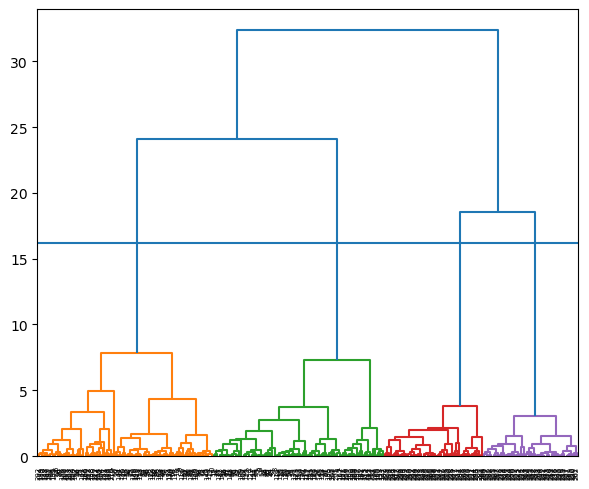

In [210]:
# plot dendrogram cluster
f1, axes = plt.subplots(figsize = (6, 5))
drogram = dendrogram(Z = row_cluster,color_threshold = threshold, distance_sort = 'descending')
plt.axhline(y = threshold)
plt.tight_layout()
plt.show()